In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import defaultdict
import datetime

In [2]:
data = pd.read_csv('Data/Prices.csv')
df = pd.DataFrame(data)

# Reverse time
df = df.iloc[::-1]

df['datetime'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df['day'] = (df['datetime'] - datetime.datetime(2010, 1, 1, 0, 0)).dt.days

# df.set_index('timestamp')
df["currency_name"].unique()

df

,Date,Open,High,Low,Close,Volume,Market Cap,currency_name,month_name,timestamp,datetime,day
510305,"May 09, 2016",0.000055,0.000055,0.000055,0.000055,24.0,3613.0,zurcoin,May,2016-05-09,2016-05-09,2320
510304,"May 10, 2016",0.000055,0.000055,0.000023,0.000032,6.0,3611.0,zurcoin,May,2016-05-10,2016-05-10,2321
510303,"May 11, 2016",0.000032,0.000145,0.000032,0.000122,369.0,2064.0,zurcoin,May,2016-05-11,2016-05-11,2322
510302,"May 12, 2016",0.000122,0.000140,0.000063,0.000077,24.0,7993.0,zurcoin,May,2016-05-12,2016-05-12,2323
510301,"May 13, 2016",0.000077,0.000086,0.000023,0.000036,28.0,5062.0,zurcoin,May,2016-05-13,2016-05-13,2324
510300,"May 14, 2016",0.000036,0.000059,0.000036,0.000059,8.0,2388.0,zurcoin,May,2016-05-14,2016-05-14,2325
510299,"May 15, 2016",0.000059,0.000064,0.000027,0.000027,16.0,3882.0,zurcoin,May,2016-05-15,2016-05-15,2326
510298,"May 16, 2016",0.000027,0.000055,0.000027,0.000050,5.0,1800.0,zurcoin,May,2016-05-16,2016-05-16,2327
510297,"May 17, 2016",0.000050,0.000050,0.000032,0.000032,3.0,3276.0,zurcoin,May,2016-05-17,2016-05-17,2328
510296,"May 18, 2016",0.000032,0.000032,0.000027,0.000027,0.0,2084.0,zurcoin,May,2016-05-18,2016-05-18,2329


In [3]:
df[df.currency_name == "2give"]

,Date,Open,High,Low,Close,Volume,Market Cap,currency_name,month_name,timestamp,datetime,day
573,"May 16, 2016",0.000192,0.000215,0.000168,0.000173,4763.0,95957.0,2give,May,2016-05-16,2016-05-16,2327
572,"May 17, 2016",0.000173,0.000908,0.000173,0.000372,28842.0,86262.0,2give,May,2016-05-17,2016-05-17,2328
571,"May 18, 2016",0.000377,0.000464,0.000237,0.000273,10526.0,188282.0,2give,May,2016-05-18,2016-05-18,2329
570,"May 19, 2016",0.000273,0.000304,0.000232,0.000245,1425.0,136495.0,2give,May,2016-05-19,2016-05-19,2330
569,"May 20, 2016",0.000244,0.000303,0.000189,0.000226,786.0,122160.0,2give,May,2016-05-20,2016-05-20,2331
568,"May 21, 2016",0.000226,0.000265,0.000186,0.000235,768.0,113244.0,2give,May,2016-05-21,2016-05-21,2332
567,"May 22, 2016",0.000235,0.000260,0.000217,0.000259,405.0,117349.0,2give,May,2016-05-22,2016-05-22,2333
566,"May 23, 2016",0.000259,0.000259,0.000186,0.000195,630.0,129580.0,2give,May,2016-05-23,2016-05-23,2334
565,"May 24, 2016",0.000195,0.000232,0.000179,0.000192,387.0,97673.0,2give,May,2016-05-24,2016-05-24,2335
564,"May 25, 2016",0.000192,0.000198,0.000117,0.000166,409.0,96220.0,2give,May,2016-05-25,2016-05-25,2336


In [4]:
results =  {}
currency_select = np.random.choice(df.currency_name.values, 3)
for curr in currency_select: 
    results[curr]= df[df.currency_name == curr][['datetime', 'Close', 'day']] 
#     print(results[curr]['timestamp']) 
print(results)  

{'unobtanium':          datetime   Close   day
468257 2013-12-21    6.48  1450
468256 2013-12-22    9.59  1451
468255 2013-12-23   14.68  1452
468254 2013-12-24   12.39  1453
468253 2013-12-25    7.55  1454
468252 2013-12-26    9.37  1455
468251 2013-12-27    7.34  1456
468250 2013-12-28    6.70  1457
468249 2013-12-29    6.36  1458
468248 2013-12-30    4.91  1459
468247 2013-12-31    7.12  1460
468246 2014-01-01    6.48  1461
468245 2014-01-02    5.82  1462
468244 2014-01-03    5.91  1463
468243 2014-01-04    6.00  1464
468242 2014-01-05    6.37  1465
468241 2014-01-06    5.40  1466
468240 2014-01-07    4.60  1467
468239 2014-01-08    5.24  1468
468238 2014-01-09    5.94  1469
468237 2014-01-10    5.88  1470
468236 2014-01-11    5.99  1471
468235 2014-01-12    5.96  1472
468234 2014-01-13    4.37  1473
468233 2014-01-14    3.88  1474
468232 2014-01-15    4.47  1475
468231 2014-01-16    4.39  1476
468230 2014-01-17    4.21  1477
468229 2014-01-18    3.97  1478
468228 2014-01-19    3.66

In [5]:
linear_regressions = dict()
for name, df_ in results.items():
    linear_regressions[name] = LinearRegression()
    linear_regressions[name].fit(X=np.asarray(df_.day).reshape(-1, 1), y=np.asarray(df_.Close))
  
# "Exponential regressions" - linear regression of logarithmic y values
# "Assumes" an exponential growth
# Doesn't get negative prices (linear regression will predict negative prices!!)
exponential_regessions = dict()
for name, df_ in results.items():
    exponential_regessions[name] = LinearRegression()
    exponential_regessions[name].fit(X=np.asarray(df_.day).reshape(-1, 1), y=np.log(df_.Close))
  


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


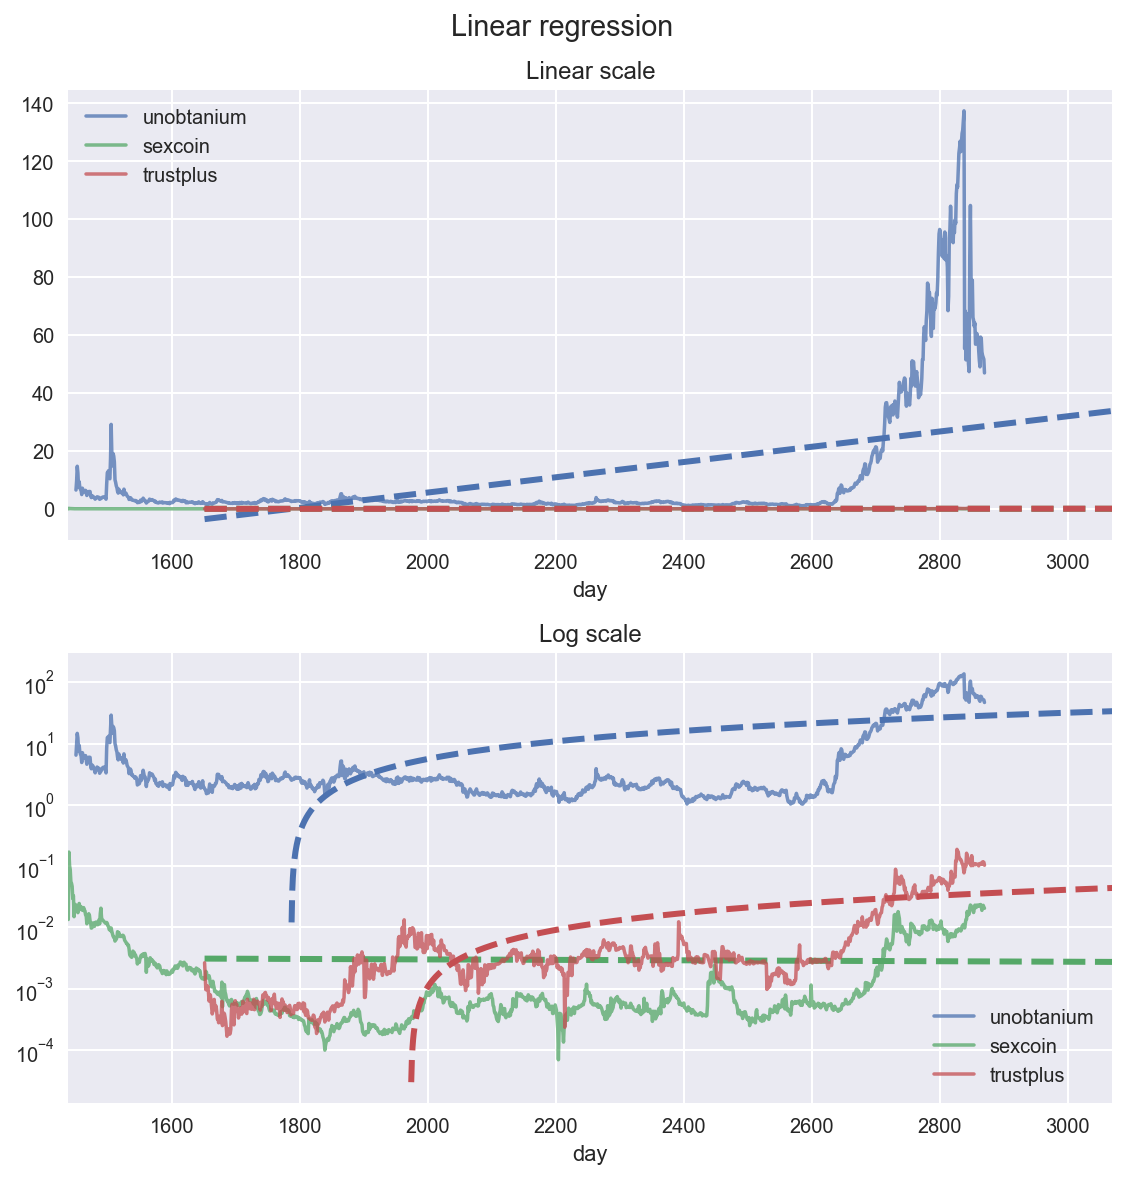

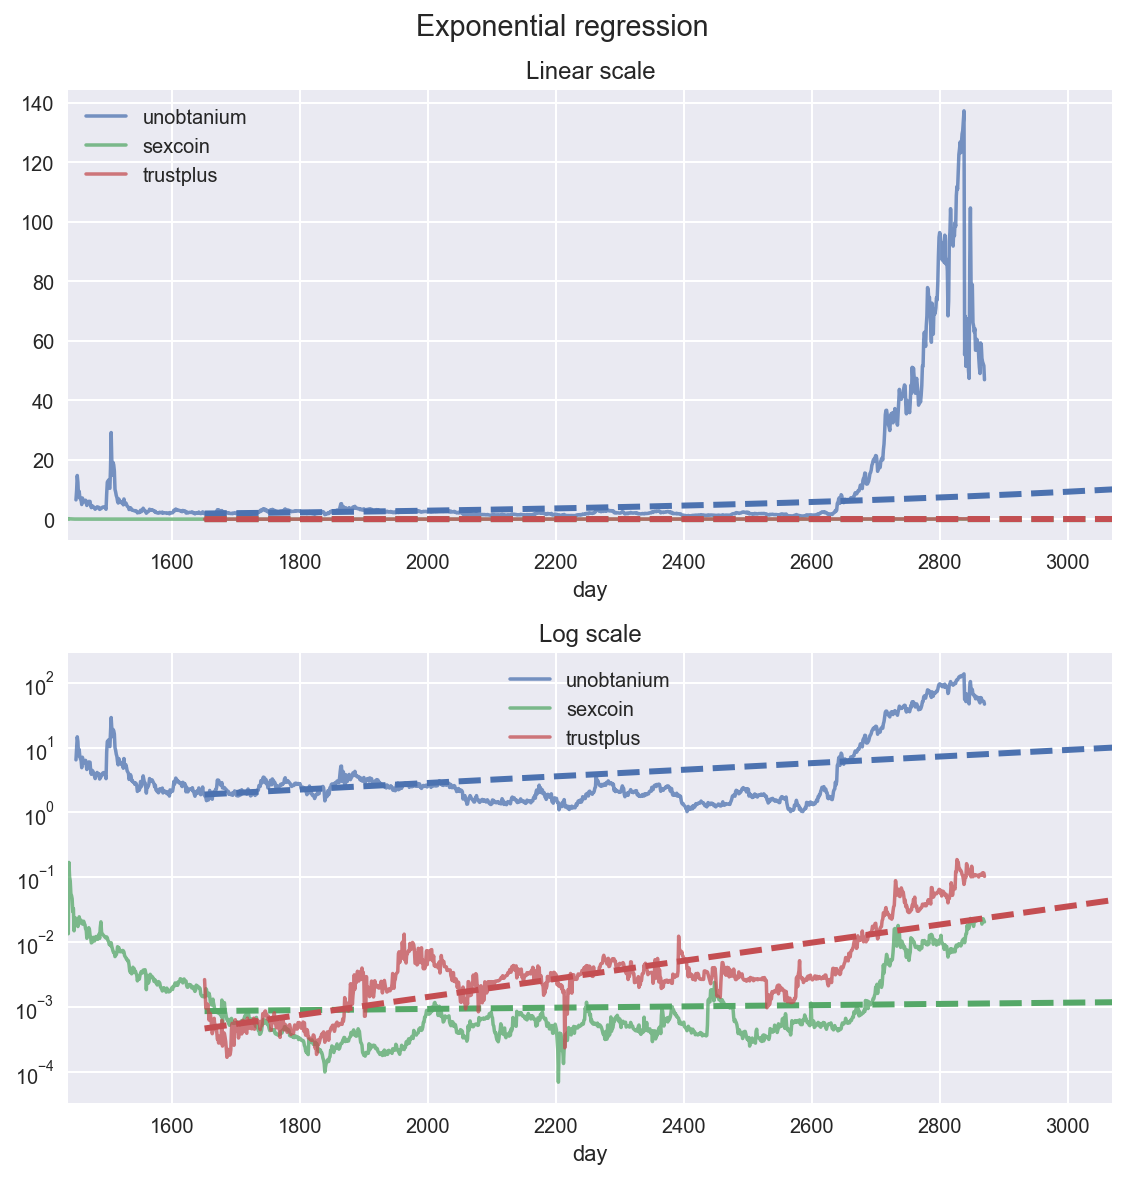

In [6]:
def _plot_reg(ax, regressions, name, n_future_days, exponentiate=False, **kwargs):
    highest_day = np.max(df_.day)
    input_days = np.append(df_.day,
                           np.arange(highest_day + 1, highest_day + n_future_days + 1)).reshape(-1, 1)
    predictions = regressions[name].predict(X=input_days)
    if exponentiate:
        predictions = np.exp(predictions)
    ax.plot(input_days, 
            predictions, 
            lw=3,
            ls="--", # line style of regression line
#             label=name + '_regression',  # comment in this line if you want a legend for the regression line
            **kwargs
           )


def make_regression_plot(mode='linear', 
                         n_future_days=200):
    """
    mode is either linear or exponential
    n_future_days is number of future days
    """
    fig, axs = plt.subplots(nrows=2, figsize=(8,8))
    
    fig.suptitle('{} regression'.format(mode.capitalize()), y=1.02)
    for xscale, ax in zip(['linear', 'log'], axs):
        for name, df_ in results.items():
            ax = df_.plot(x='day', y='Close', ax=ax, label=name, alpha=0.75)
            if mode == 'linear':
                _plot_reg(ax, linear_regressions, name, n_future_days, color=ax.lines[-1].get_color())
            elif mode == 'exponential':
                _plot_reg(ax, exponential_regessions, name, n_future_days, exponentiate=True, color=ax.lines[-1].get_color())
            else:
                raise ValueError('The mode "{}" has not been implemented.' 
                                 'Choose among "linear", "exponential"!'.format(mode))
        ax.set_yscale(xscale)
        ax.set_title('{} scale'.format(xscale.capitalize()))
        ax.legend(loc=0)

        # In case you want to change limits...
        # ax.set_xlim(from, to)
        # ax.set_ylim(from, to)
    fig.tight_layout()
    plt.show()


make_regression_plot('linear')
make_regression_plot('exponential')
